In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
df = pd.read_csv('boston_data.csv')

In [5]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# All features are numerical

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
# No Null Values

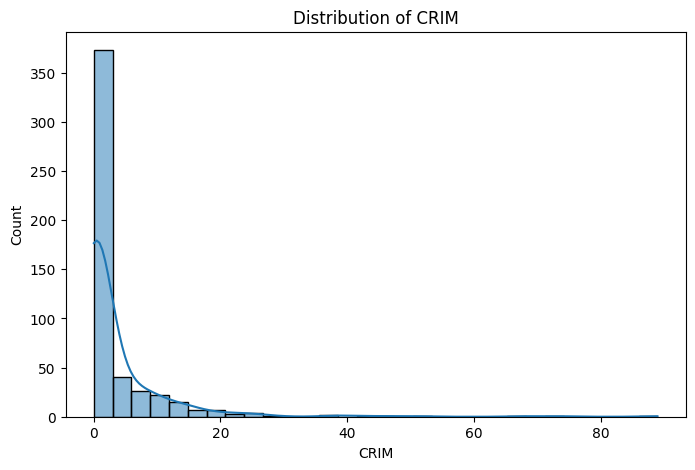

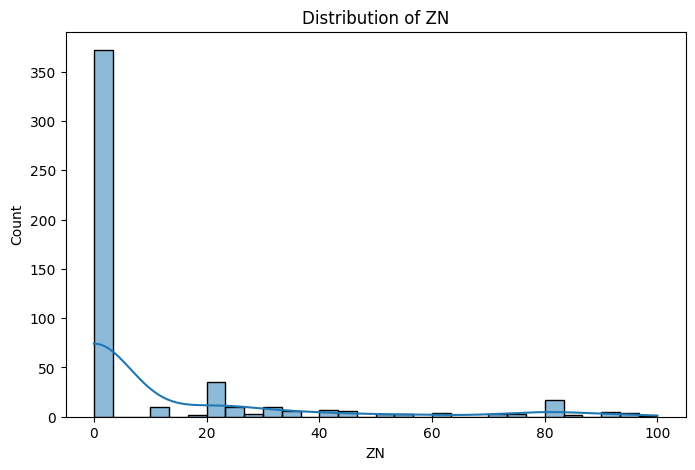

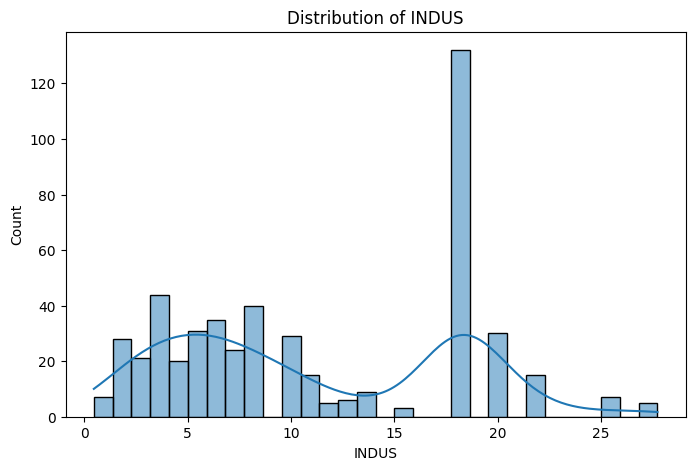

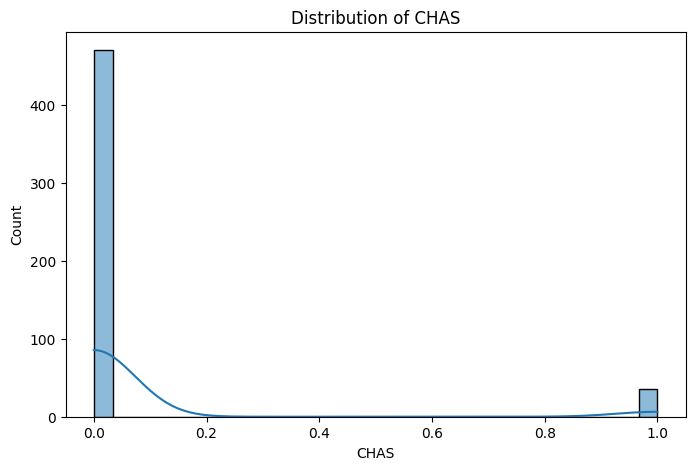

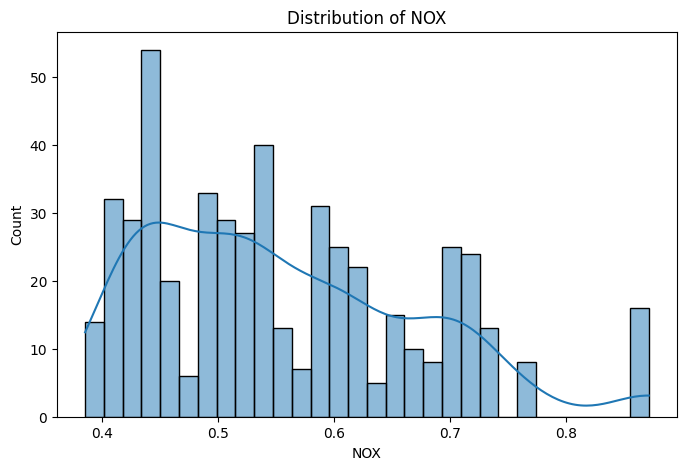

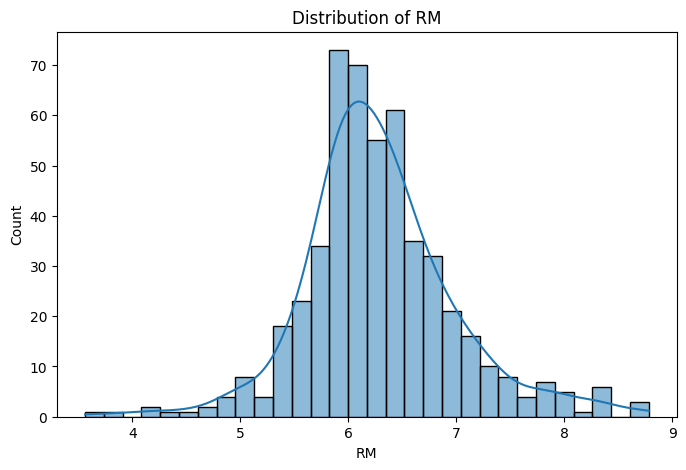

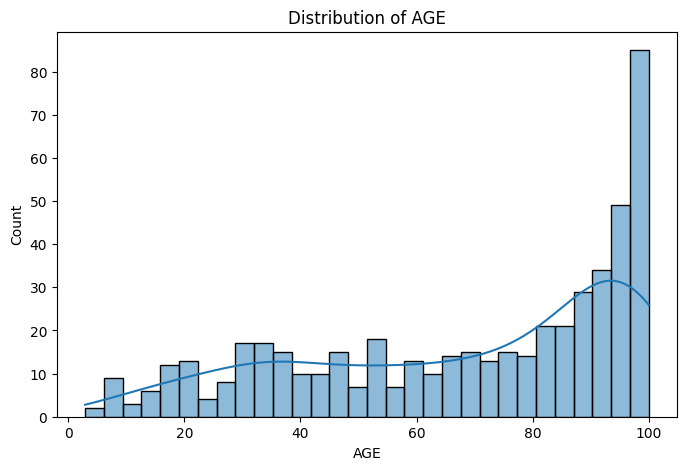

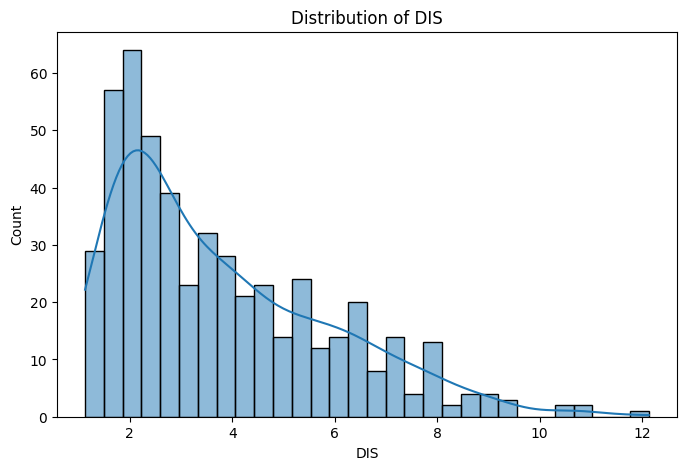

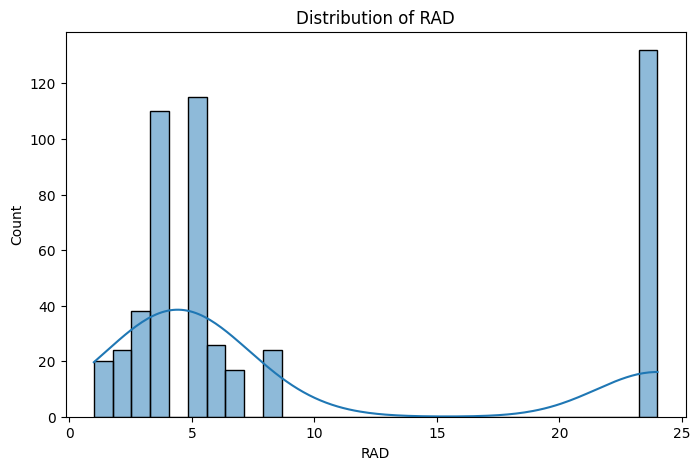

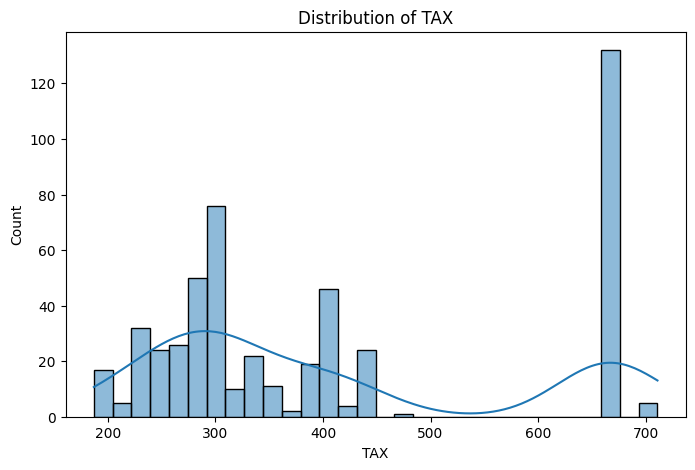

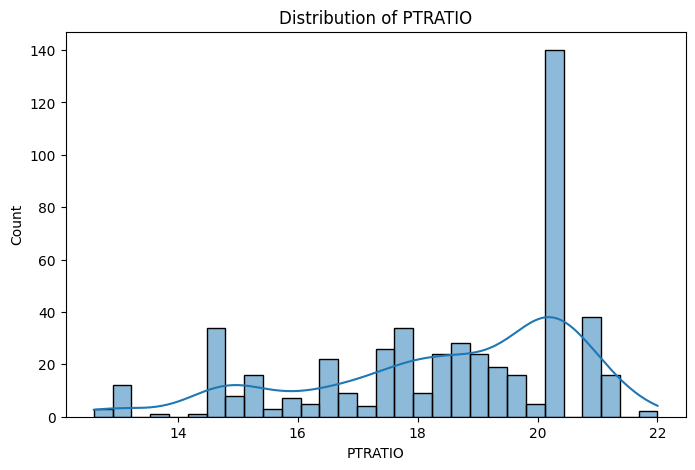

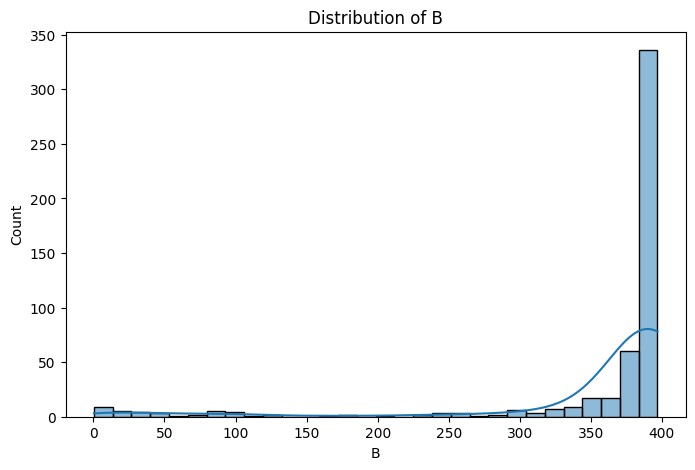

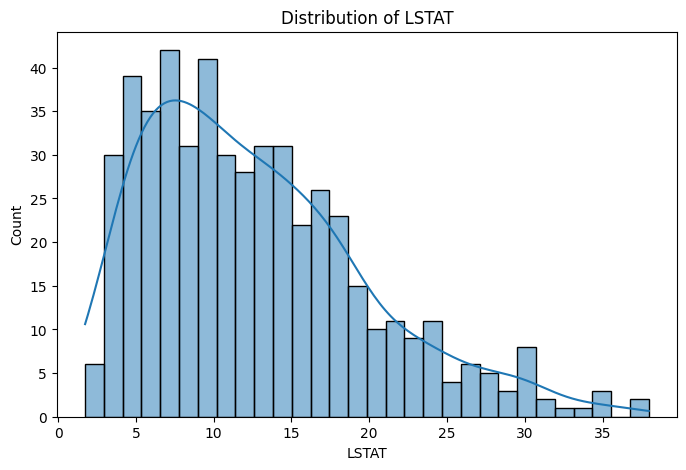

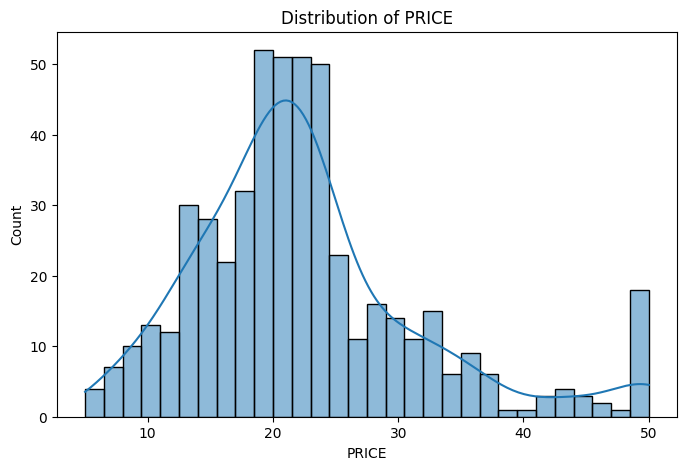

In [10]:
# Univariate Analysis
for col in df.columns:
    plt.figure(figsize = (8,5))
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(f"Distribution of {col}")
    plt.show()

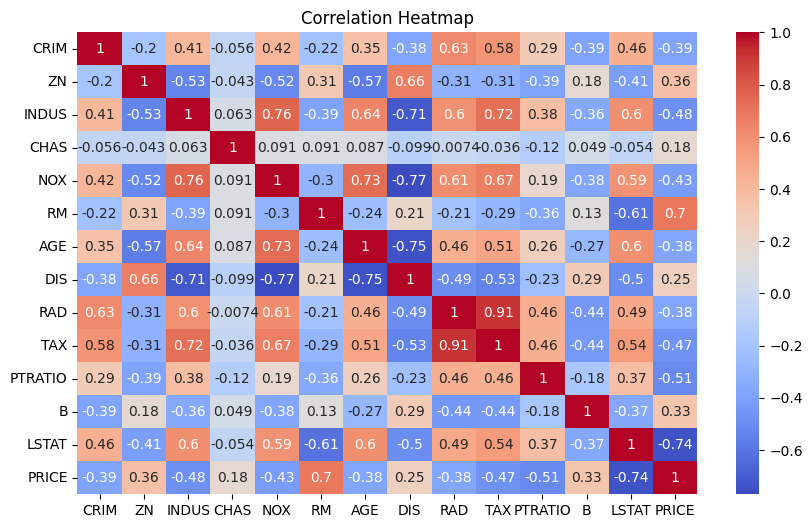

In [11]:
# Bivariate Analysis

plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

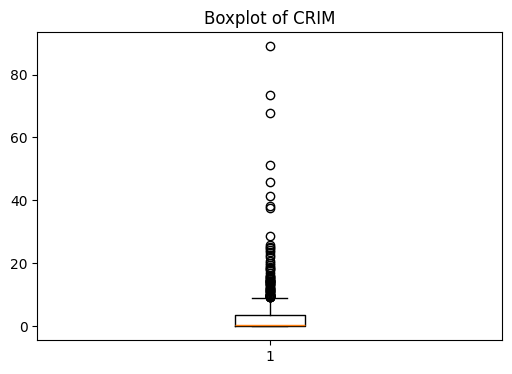

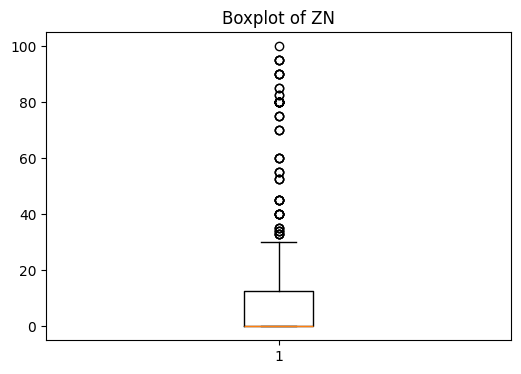

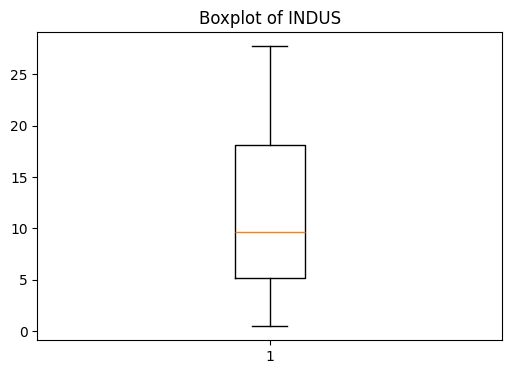

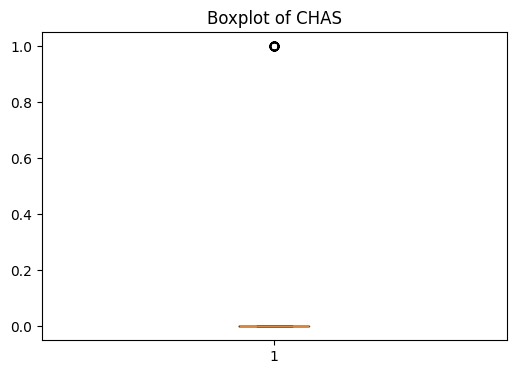

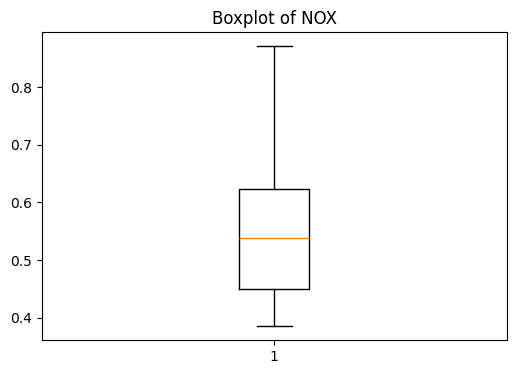

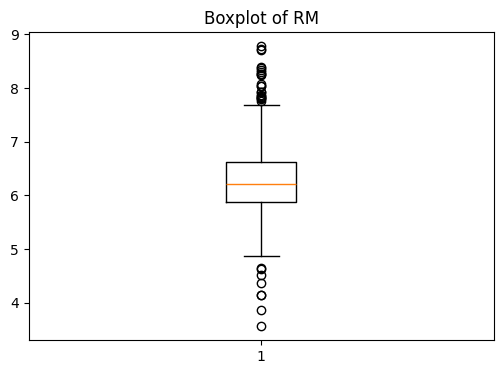

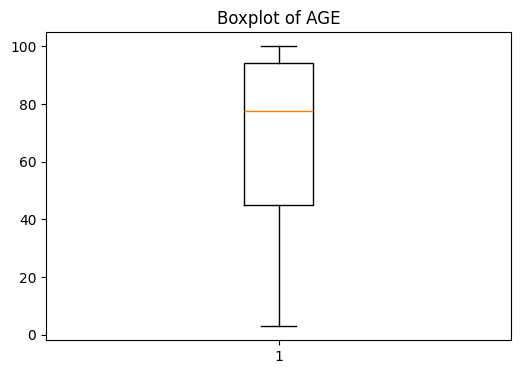

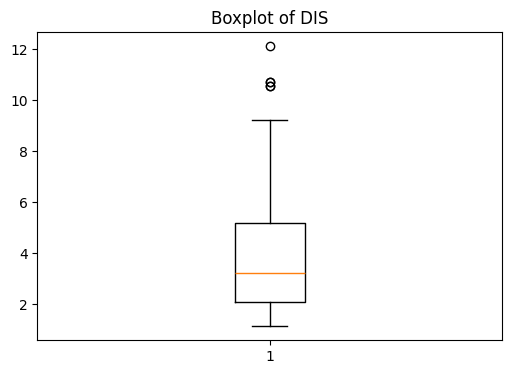

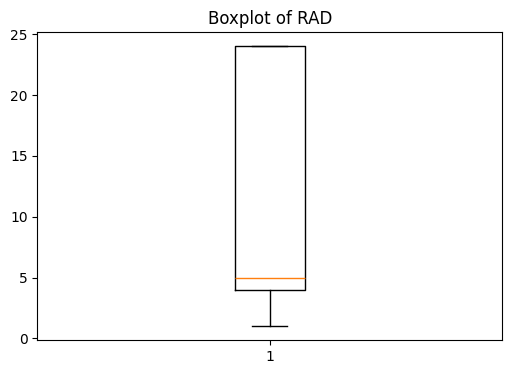

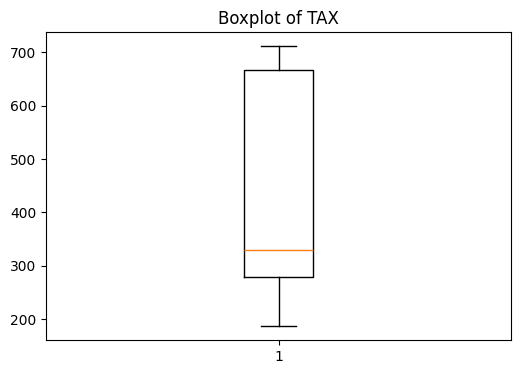

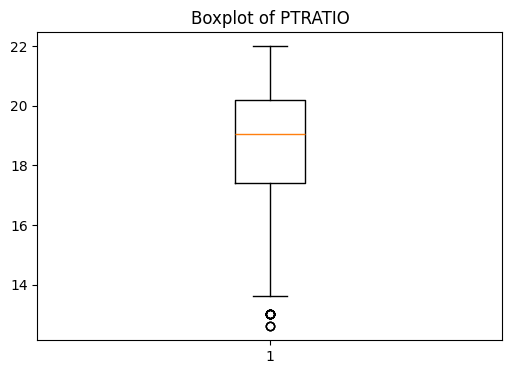

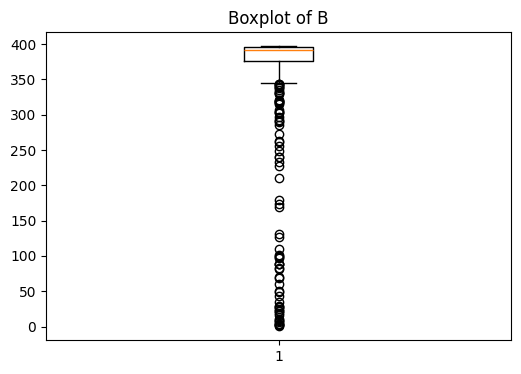

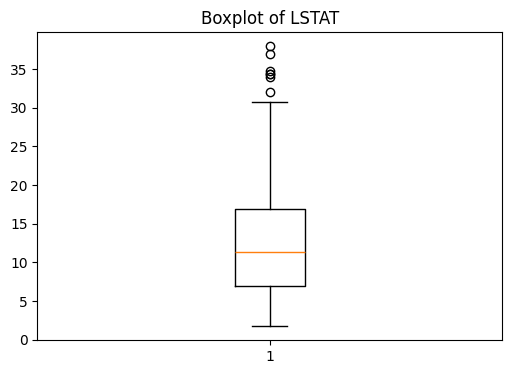

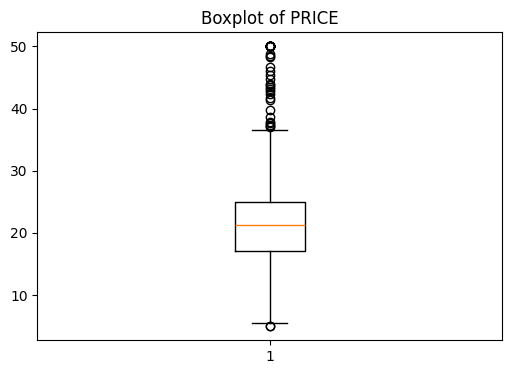

In [72]:
# Detect and visualize outliers using boxplot
for col in df.columns:
    plt.figure(figsize = (6, 4))
    plt.boxplot(x = df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [32]:
# Columns with higher correlation
corr = df.corr()
upper_tri = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool))
high_corr_pair = [(col, row, upper_tri.loc[row, col])
                 for col in upper_tri.columns
                 for row in upper_tri.index
                 if abs(upper_tri.loc[row, col]) > 0.7]
high_corr_pair

[('NOX', 'INDUS', np.float64(0.7636514469209139)),
 ('AGE', 'NOX', np.float64(0.7314701037859592)),
 ('DIS', 'INDUS', np.float64(-0.7080269887427675)),
 ('DIS', 'NOX', np.float64(-0.7692301132258282)),
 ('DIS', 'AGE', np.float64(-0.747880540868632)),
 ('TAX', 'INDUS', np.float64(0.7207601799515422)),
 ('TAX', 'RAD', np.float64(0.9102281885331865)),
 ('PRICE', 'LSTAT', np.float64(-0.7376627261740145))]

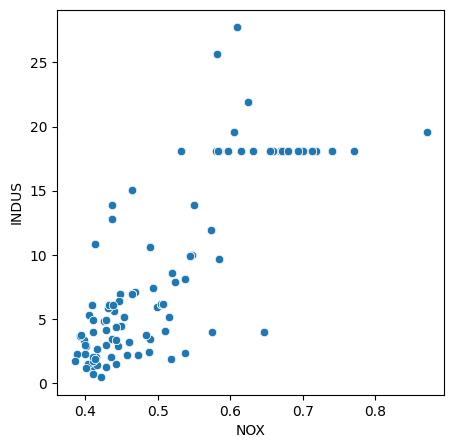

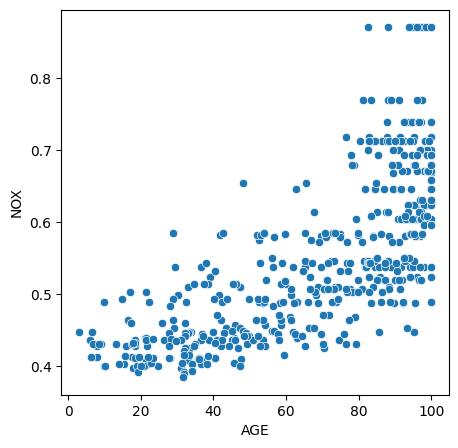

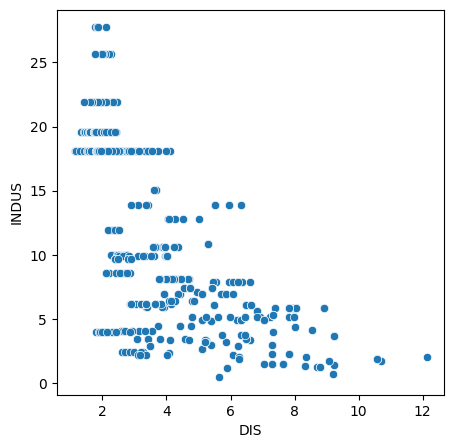

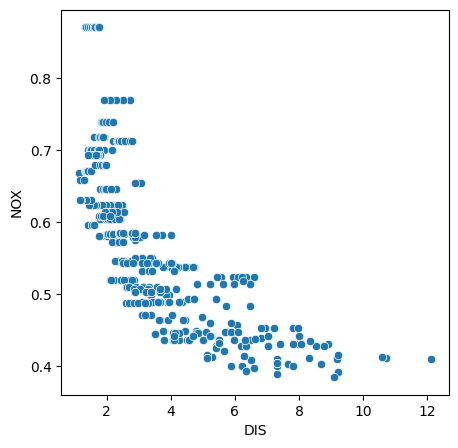

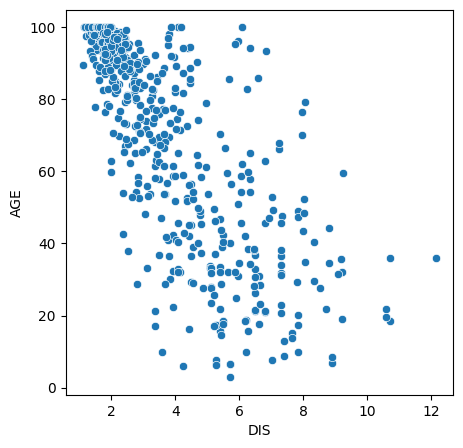

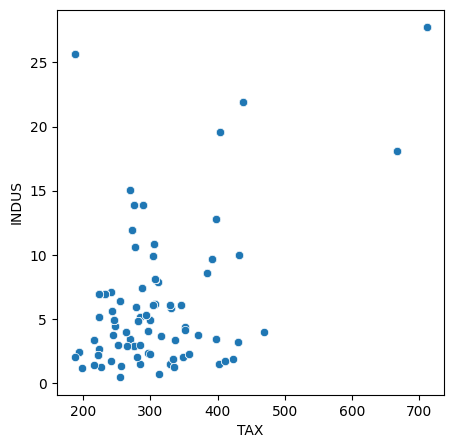

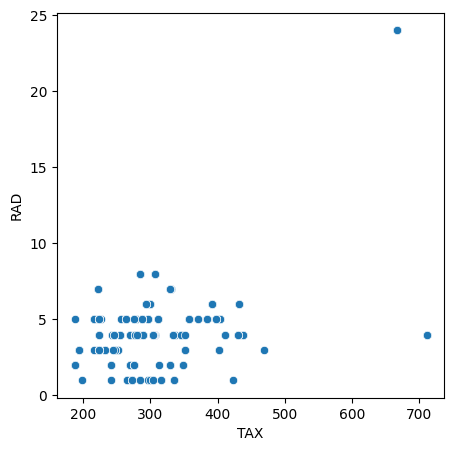

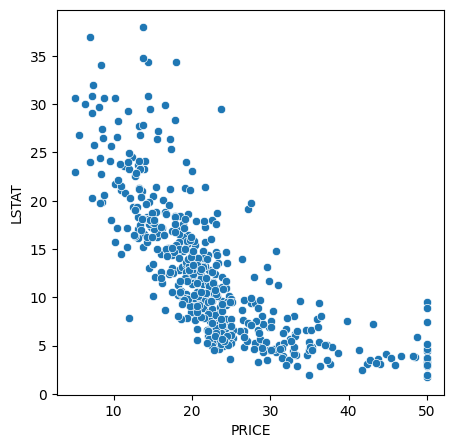

In [37]:
for i, j, k in high_corr_pair:
    plt.figure(figsize = (5, 5))
    sns.scatterplot(x = i, y = j, data = df)
    plt.show()

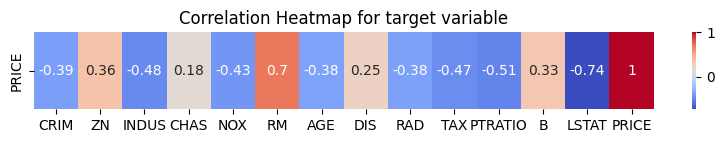

In [23]:
plt.figure(figsize = (10, 1))
sns.heatmap(df.corr().tail(1), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap for target variable")
plt.show()

In [60]:
# vif = pd.DataFrame()
# vif["Featues"] = x.columns
# vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
# vif

In [107]:
# Check and cap outliers as removing result in significant loss of data
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lb, lb, df[col])
    df[col] = np.where(df[col] > ub, ub, df[col])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [108]:
# Transform skewed features
transformer = PowerTransformer()
df[df.columns] = transformer.fit_transform(df)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-1.082629,1.634643,-1.523776,0.0,0.027165,0.512044,-0.212875,0.443054,-2.314674,-0.556334,-1.414989,1.026311,-1.258317,0.342798
1,-1.022030,-0.600117,-0.443938,0.0,-0.716093,0.274321,0.314385,0.798928,-1.448933,-1.175887,-0.519279,1.026311,-0.339443,0.035119
2,-1.022087,-0.600117,-0.443938,0.0,-0.716093,1.406905,-0.363383,0.798928,-1.448933,-1.175887,-0.519279,0.510073,-1.541136,1.584960
3,-1.007795,-0.600117,-1.564275,0.0,-0.851247,1.140125,-0.891929,1.150602,-0.909551,-1.461842,-0.075849,0.726414,-1.925945,1.443335
4,-0.908673,-0.600117,-1.564275,0.0,-0.851247,1.353207,-0.608476,1.150602,-0.909551,-1.461842,-0.075849,1.026311,-1.163421,1.745708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.925522,-0.600117,0.293061,0.0,0.344891,0.539503,-0.066501,-0.514055,-2.314674,-0.797315,1.430345,0.415157,-0.246159,0.139139
502,-0.972132,-0.600117,0.293061,0.0,0.344891,-0.205432,0.227305,-0.669875,-2.314674,-0.797315,1.430345,1.026311,-0.350254,-0.097106
503,-0.930469,-0.600117,0.293061,0.0,0.344891,1.108316,0.808711,-0.774494,-2.314674,-0.797315,1.430345,1.026311,-1.082912,0.330232
504,-0.806826,-0.600117,0.293061,0.0,0.344891,0.841628,0.737737,-0.585632,-2.314674,-0.797315,1.430345,0.582554,-0.879335,0.087319


In [109]:
# Feature Selection
x = df.drop("PRICE", axis = 1)
y = df["PRICE"]

In [110]:
# Recursive Feature Elimination using Random Forest
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfe = RFE(model, n_features_to_select = 10)
x_rfe = rfe.fit_transform(x,y)
selected_columns = x.columns[rfe.support_]
print(selected_columns)
df = df[selected_columns].join(y)

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')


In [114]:
df.corr()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.736181,0.815590,-0.295506,0.653512,-0.723976,0.807707,0.416912,0.570949,-0.539024
INDUS,0.736181,1.000000,0.788570,-0.437070,0.662094,-0.757950,0.685052,0.448341,0.629434,-0.590732
NOX,0.815590,0.788570,1.000000,-0.333929,0.794761,-0.876798,0.651154,0.333691,0.612216,-0.532889
RM,-0.295506,-0.437070,-0.333929,1.000000,-0.274203,0.290846,-0.306043,-0.339186,-0.673444,0.662895
AGE,0.653512,0.662094,0.794761,-0.274203,1.000000,-0.790958,0.498273,0.331360,0.625399,-0.486549
DIS,-0.723976,-0.757950,-0.876798,0.290846,-0.790958,1.000000,-0.586120,-0.298870,-0.546531,0.420403
TAX,0.807707,0.685052,0.651154,-0.306043,0.498273,-0.586120,1.000000,0.451855,0.514903,-0.560866
PTRATIO,0.416912,0.448341,0.333691,-0.339186,0.331360,-0.298870,0.451855,1.000000,0.440561,-0.536636
LSTAT,0.570949,0.629434,0.612216,-0.673444,0.625399,-0.546531,0.514903,0.440561,1.000000,-0.841794
PRICE,-0.539024,-0.590732,-0.532889,0.662895,-0.486549,0.420403,-0.560866,-0.536636,-0.841794,1.000000


In [113]:
# Spearman Correlation filtering
spearman_corr = {col: abs(spearmanr(df[col], df['PRICE'])[0]) for col in df.columns if col != 'PRICE'}
selected_features = [col for col, corr in spearman_corr.items() if corr > 0.3]  # Threshold selection
df = df[selected_features + ['PRICE']]
df

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
0,-1.082629,-1.523776,0.027165,0.512044,-0.212875,0.443054,-0.556334,-1.414989,-1.258317,0.342798
1,-1.022030,-0.443938,-0.716093,0.274321,0.314385,0.798928,-1.175887,-0.519279,-0.339443,0.035119
2,-1.022087,-0.443938,-0.716093,1.406905,-0.363383,0.798928,-1.175887,-0.519279,-1.541136,1.584960
3,-1.007795,-1.564275,-0.851247,1.140125,-0.891929,1.150602,-1.461842,-0.075849,-1.925945,1.443335
4,-0.908673,-1.564275,-0.851247,1.353207,-0.608476,1.150602,-1.461842,-0.075849,-1.163421,1.745708
...,...,...,...,...,...,...,...,...,...,...
501,-0.925522,0.293061,0.344891,0.539503,-0.066501,-0.514055,-0.797315,1.430345,-0.246159,0.139139
502,-0.972132,0.293061,0.344891,-0.205432,0.227305,-0.669875,-0.797315,1.430345,-0.350254,-0.097106
503,-0.930469,0.293061,0.344891,1.108316,0.808711,-0.774494,-0.797315,1.430345,-1.082912,0.330232
504,-0.806826,0.293061,0.344891,0.841628,0.737737,-0.585632,-0.797315,1.430345,-0.879335,0.087319


In [77]:
# # Scale features using StandardScaler
# scaler = StandardScaler()
# x = df.drop(columns = ['PRICE'])
# df[x.columns] = scaler.fit_transform(x)
# df

In [80]:
# split data
x = df.drop(columns = ['PRICE'])
y = df['PRICE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [89]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
}

In [91]:
model_performance = {}

In [92]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    # print("MAE: ", mae)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print("RMSE: ", rmse)
    r2 = r2_score(y_test, y_pred)
    # print("R2 Score: ", r2)
    model_performance[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

In [93]:
perf_df = pd.DataFrame(model_performance).T
perf_df

,MAE,RMSE,R2
Linear Regression,0.320553,0.455485,0.763700
Decision Tree,0.358770,0.521146,0.690661
Random Forest,0.252507,0.345381,0.864133


In [ ]:
# RandomForest have highest R2 Score, heance best model

In [99]:
# Perform hyperparameter tuning on RandomForest

param_grid = {
    "n_estimators" : [100, 200, 300],
    "max_depth" : [10, 20, None],
    "min_samples_split" : [2, 5, 10]
}

model = RandomForestRegressor(random_state = 42).fit(x_train, y_train)

In [100]:
gscv = GridSearchCV(model, param_grid, cv = 5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [102]:
best_model = gscv.best_estimator_

In [103]:
best_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [104]:
y_pred = best_model.predict(x_test)

In [105]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

MAE:  0.2528948855419001
RMSE:  0.34254846926926746
R2 Score:  0.8663527727582427
